In [1]:
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
!pip install tempfile2

ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmdb3 libmdbsql3
Suggested packages:
  bash-completion
The following NEW packages will be installed:
  libmdb3 libmdbsql3 mdbtools
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 136 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdb3 amd64 1.0.0+dfsg-1 [68.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdbsql3 amd64 1.0.0+dfsg-1 [18.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mdbtools amd64 1.0.0+dfsg-1 [48.3 kB]
Fetched 136 kB in 1s (260 kB/s)
Selecting previously unselected package libmdb3:amd64.
(Reading databas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display
from tqdm import trange

In [15]:

# 使用例
table_name = 'HorseResult'  # テーブル名を指定

years = range(2000, 2026)

k_a_util.prepare_pd_on_notebook()

dict_statistics={}
for i in trange(len(years)):
  y = years[i]
  filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_{y}.accdb'
  df_summary = k_a_util.read_table(filepath, table_name)
  if(df_summary is not None):
    columns_to_drop = [ 'rr_r_id','rr_r_horse_name','rr_r_horse_id','rr_r_jockey','rr_r_horse_no', 'upd']
    df = df_summary.drop(columns=columns_to_drop)

    dict_statistics[y] = df

 88%|████████▊ | 23/26 [02:23<00:16,  5.48s/it]

Error: テーブル 'HorseResult' はファイル '/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_2023.accdb' に存在しません。
Error: テーブル 'HorseResult' はファイル '/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_2024.accdb' に存在しません。


100%|██████████| 26/26 [02:24<00:00,  5.55s/it]


In [16]:
dict_statistics[2000]

,rr_r_race,rr_r_rank,rr_r_waku,rr_r_blinker,rr_r_j_mark,rr_r_age,rr_r_gender,rr_r_burden,rr_r_weight,rr_r_gal_sign,rr_r_gal_val,rr_r_vote,rr_r_odds,rr_r_j_id,rr_r_t_id,rr_r_o_id,rr_r_trainer,rr_r_time,rr_r_f3_time,rr_r_diff1,rr_r_diff2,rr_r_diff3,rr_r_time_diff,rr_r_corner1,rr_r_corner2,rr_r_corner3,rr_r_corner4,rr_r_horse_sign,rr_r_varieties,rr_r_belongs,rr_m_jra_bilongs,rr_m_feet1,rr_m_feet2,rr_m_feet3,rr_m_feet4,rr_h_prev_id1,rr_h_prev_id2,rr_h_prev_id3,rr_h_prev_id4,rr_h_sc_prev_id1,rr_h_sc_prev_id2,rr_h_sc_prev_id3,rr_h_sc_prev_id4,rr_m_blood01,rr_m_blood02,rr_m_blood03,rr_m_blood04,rr_m_blood05,rr_m_blood06,rr_m_blood07,rr_m_blood08,rr_m_blood09,rr_m_blood10,rr_m_blood11,rr_m_blood12,rr_m_blood13,rr_m_blood14,rr_a_deviation,rr_a_deviation3f,rr_a_race_count,rr_r_err,rr_r_breeder_code,upd_t
0,05,07,5,0,0,04,2,540,466,+,002,01,0000,00000,00000,000000,津野総夫,1504,000,2,NaN,NaN,+031,00,00,00,00,00,1,0,0,000,000,000,000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0.064872317,0.5,0,0,00000000,NaN
1,05,03,1,0,0,04,2,540,456,+,006,03,0000,00000,00000,000000,高橋道雄,1485,000,6,NaN,NaN,+012,00,00,00,00,00,1,0,0,000,000,000,000,0000000000,0000000000,0000000000,0000000000,2000041660,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0.25655946,0.5,0,0,00000000,NaN
2,05,04,6,0,0,04,2,540,408,+,002,07,0000,00000,00000,000000,清野忠雄,1491,000,3,NaN,NaN,+018,00,00,00,00,00,1,0,0,000,000,000,000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0.17213656,0.5,0,0,00000000,NaN
3,05,02,7,0,0,04,3,550,424,+,014,07,0000,00000,00000,000000,赤間亨,1474,000,12,NaN,NaN,+001,00,00,00,00,00,1,0,0,000,000,001,003,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,1120001565,1220033795,1120001062,1220023632,1120000449,1220020962,1140000450,1240005039,1120000062,1220000428,1130000149,1240003463,1120000028,1210009010,0.46627539,0.5,0,0,70050600,NaN
4,05,08,3,0,0,04,2,540,440,+,004,04,0000,00000,00000,000000,松川史朗,1524,000,T,NaN,NaN,+051,00,00,00,00,00,1,0,0,002,005,011,008,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,1120000948,1220036227,1110000576,1220010362,1120000860,1220023461,1130000150,1240004038,1130000137,1230001117,1120000058,1220006662,1120000139,1220011523,0.012654158,0.5,0,0,20005900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71821,11,02,7,0,0,05,1,545,470,NaN,000,04,0000,00000,00000,000000,井上孝彦,1482,000,34,NaN,NaN,+001,00,00,00,00,00,1,0,0,001,005,006,005,2000120909,2000112847,2000110860,2000101547,0000000000,0000000000,0000000000,0000000000,1120001046,1220025688,1140001310,1240005555,1120000415,1220012167,1130001359,1240005550,1130000842,1240005554,1130000096,1220005156,1110000960,1210008517,0.77563685,0.5,13,0,43005200,NaN
71822,11,10,5,0,0,05,1,545,478,+,002,05,0000,00000,00000,000000,岩田幸一,1498,000,12,NaN,NaN,+017,00,00,00,00,00,1,0,0,000,000,000,000,2000121148,2000033048,2000022948,2000021548,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0000000000,0.51017481,0.5,5,N,00000000,NaN
71823,11,11,3,0,0,05,1,520,506,+,012,06,0000,00000,00000,000000,松村勇,1503,000,212,NaN,NaN,+022,00,00,00,00,00,1,0,0,000,001,

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dict_statistics, rows, cols, dpi=80):
    """
    指定された辞書の各DataFrameのヒストグラムをプロットする関数です。

    Args:
        dict_statistics: プロット対象のDataFrameを含む辞書。
        rows: グラフの行数。
        cols: グラフの列数。
        dpi: グラフの解像度。

    Returns:
        None
    """
    plt.subplots_adjust(wspace=0.4, hspace=1.0)
    for col, df in dict_statistics.items():
        print(f"{col}")
        # グラフのサイズを指定
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4, rows*3), dpi=dpi)

        # 各列のヒストグラムをプロット
        for i, y in enumerate(df.columns):
            ax = axes[i // cols, i % cols]
            df[y].hist(ax=ax, bins=20)  # ヒストグラムのビンの数を調整可能
            ax.set_title(y)

        # グラフのレイアウト調整
        #plt.tight_layout()
        plt.suptitle(f"Histograms for Year {col}", fontsize=14)

        # グラフの保存 (必要に応じて)
        # plt.savefig(f"histograms_{year}.png")
        plt.show()



In [34]:
dict_results = k_a_util.pivot_statistics_by_column2(dict_statistics)



列 'upd_t' は存在しません。


rr_r_race


<Figure size 640x480 with 0 Axes>

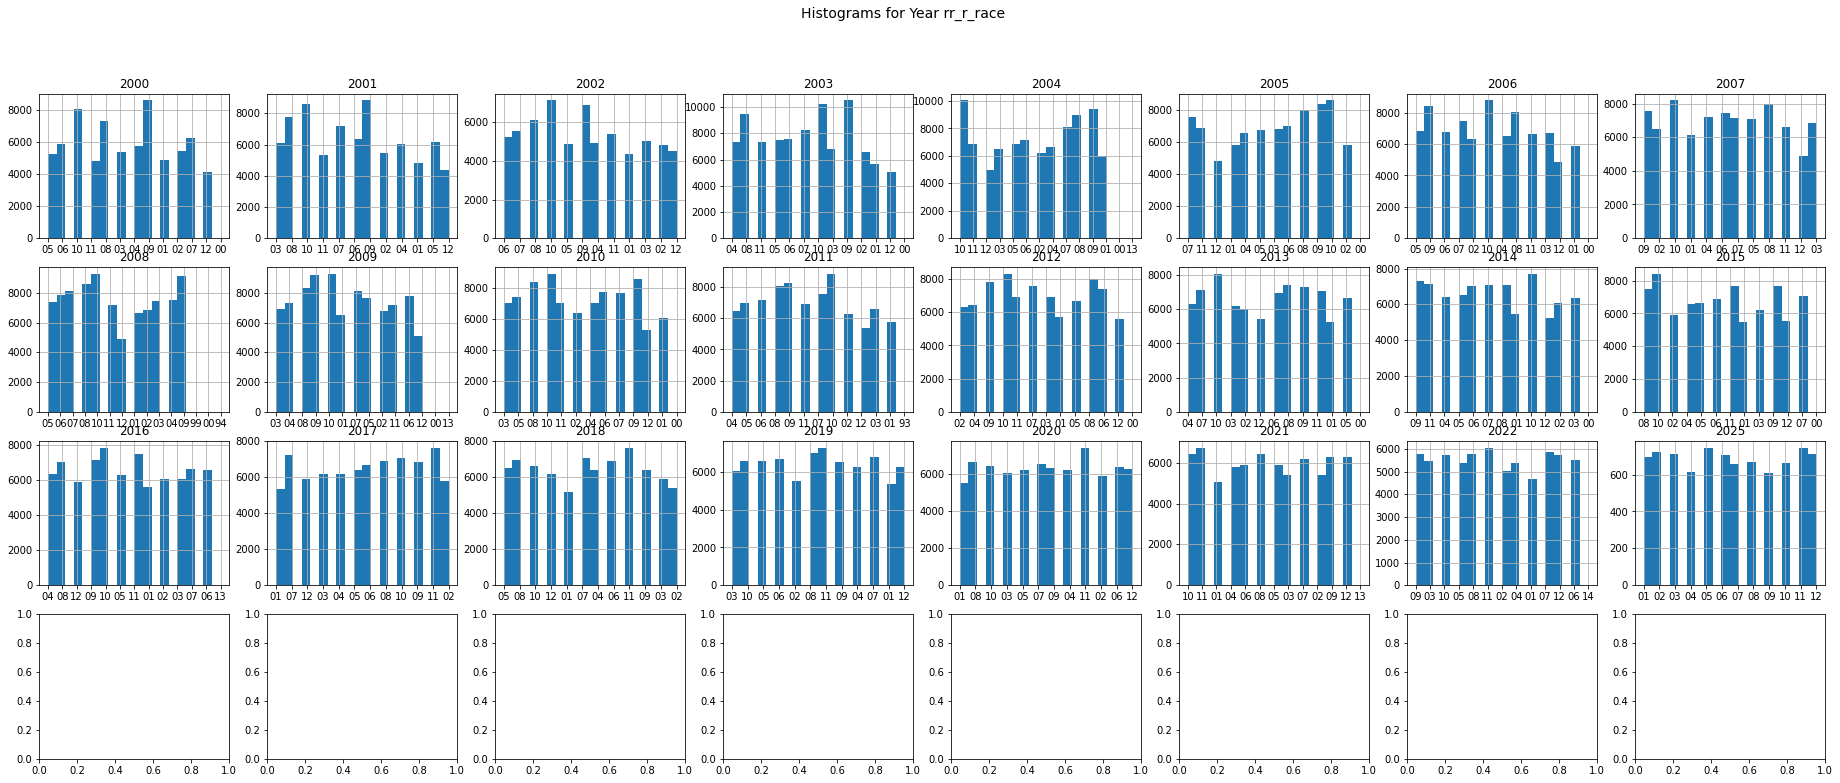

rr_r_rank


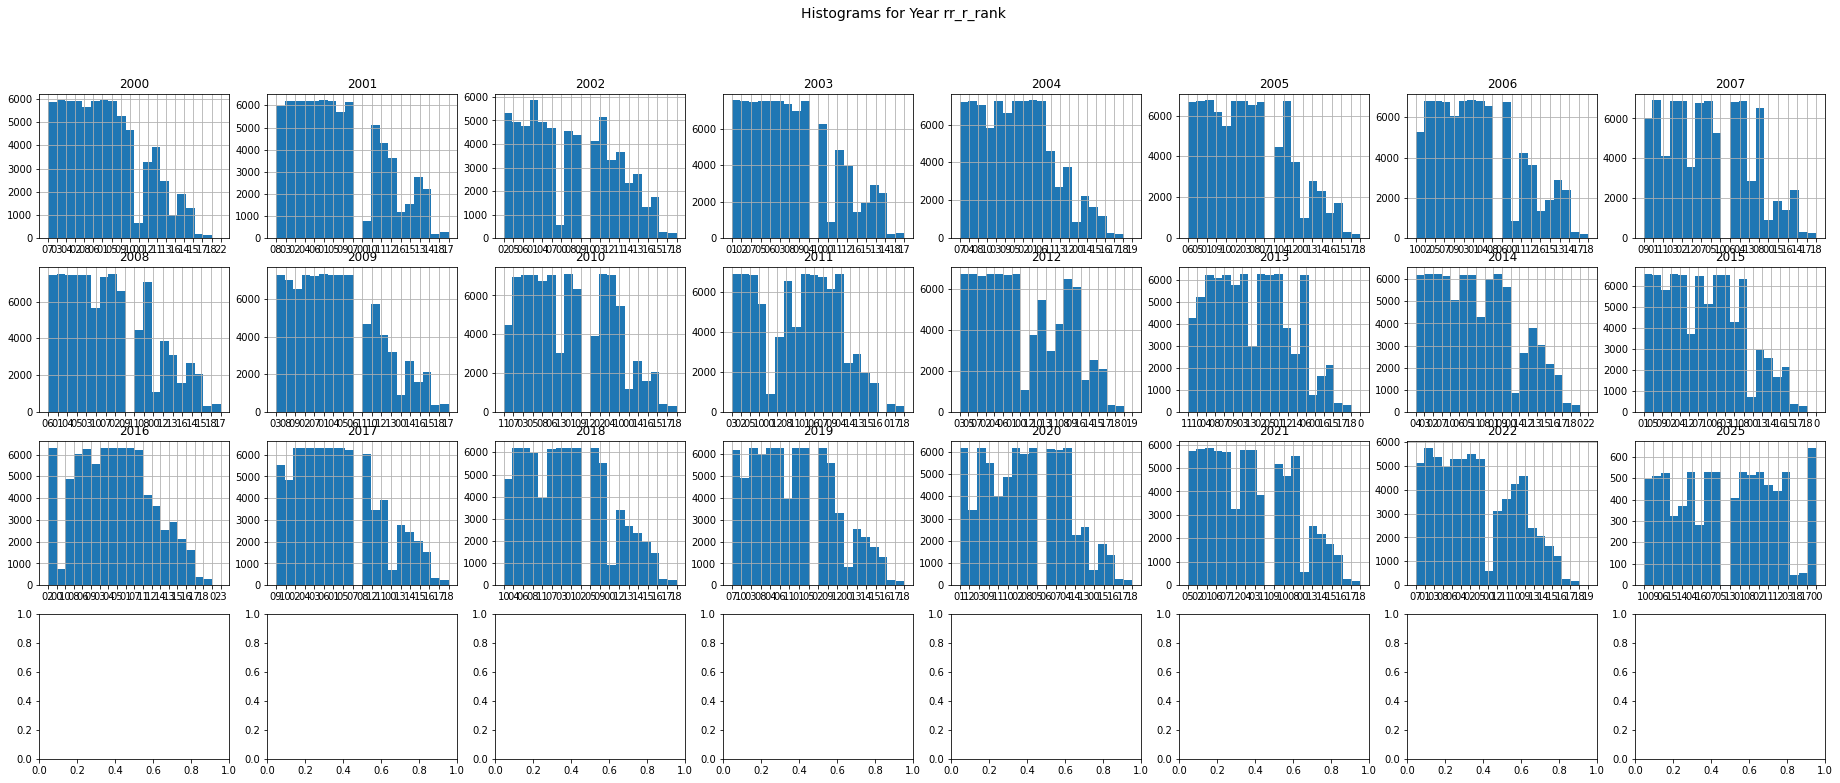

rr_r_waku


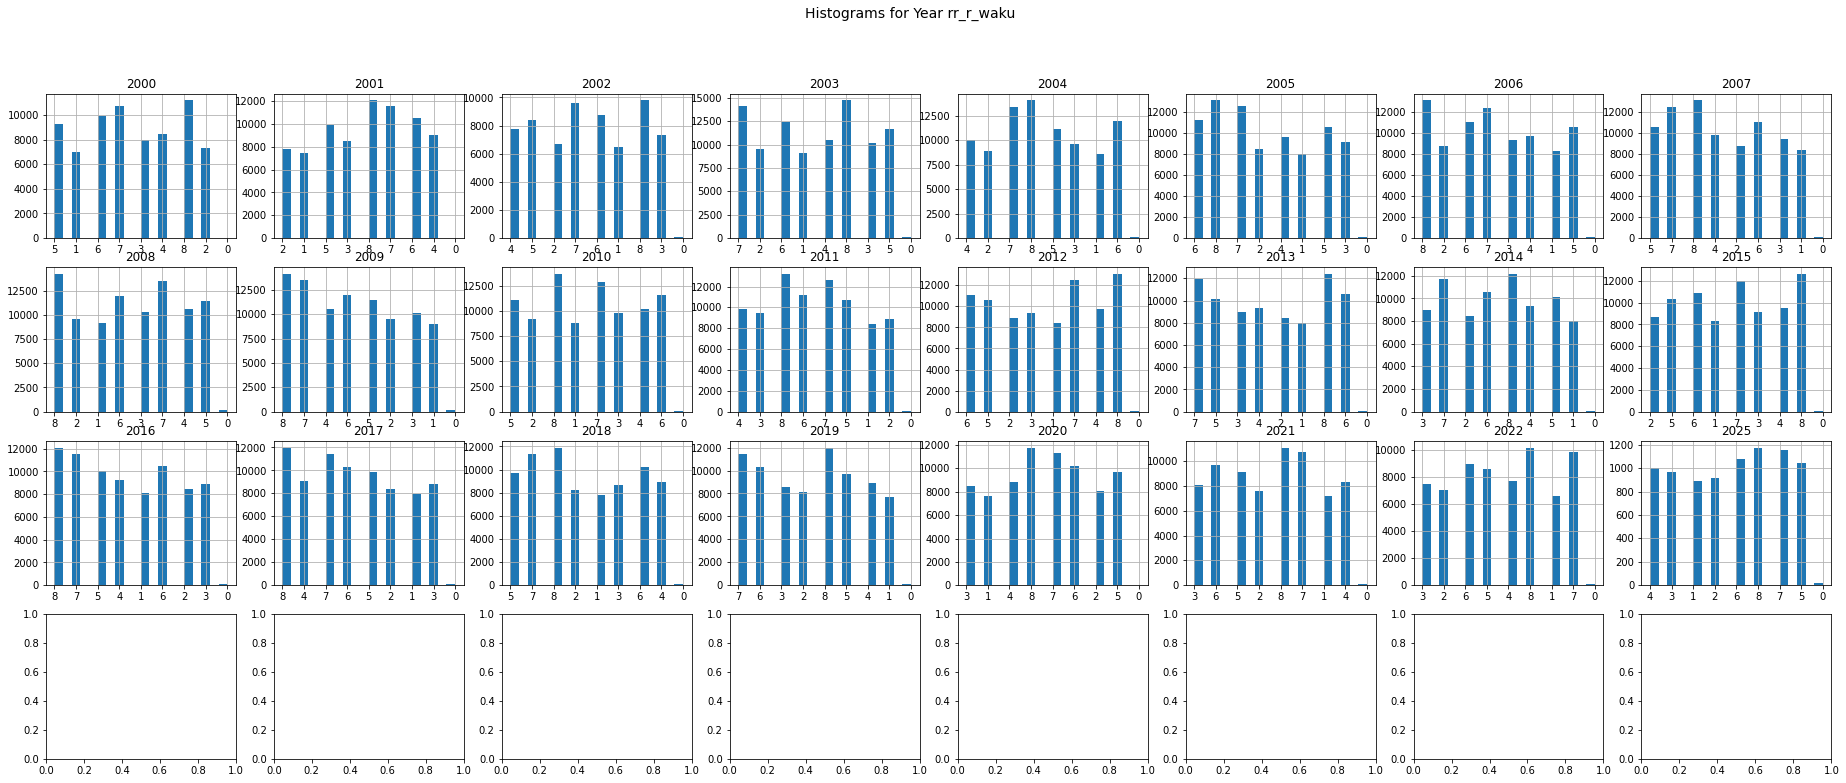

rr_r_blinker


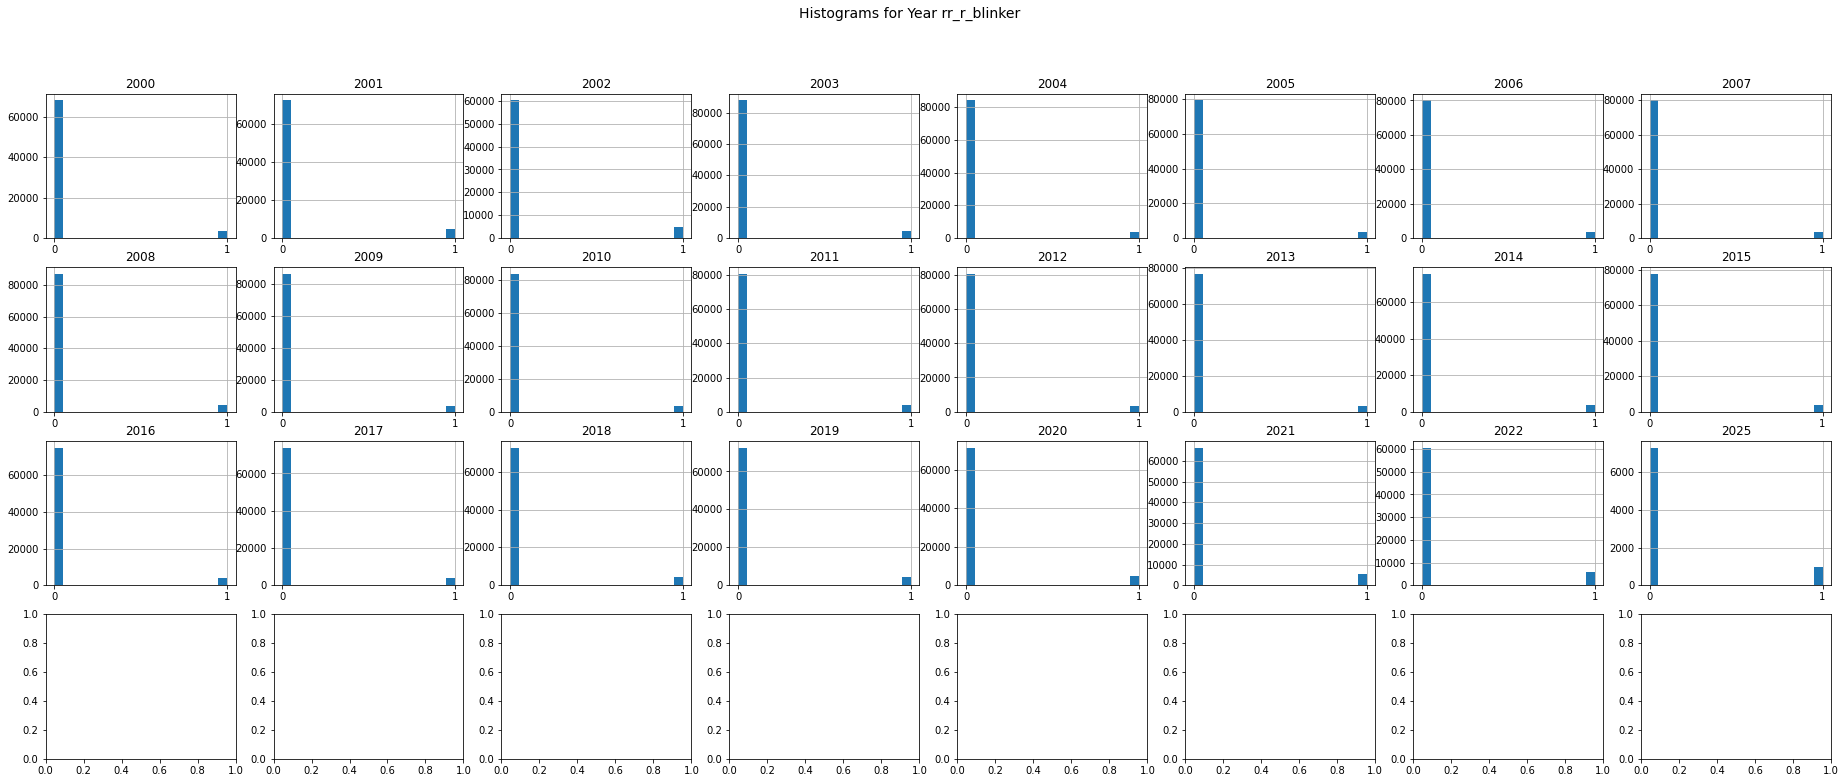

rr_r_j_mark


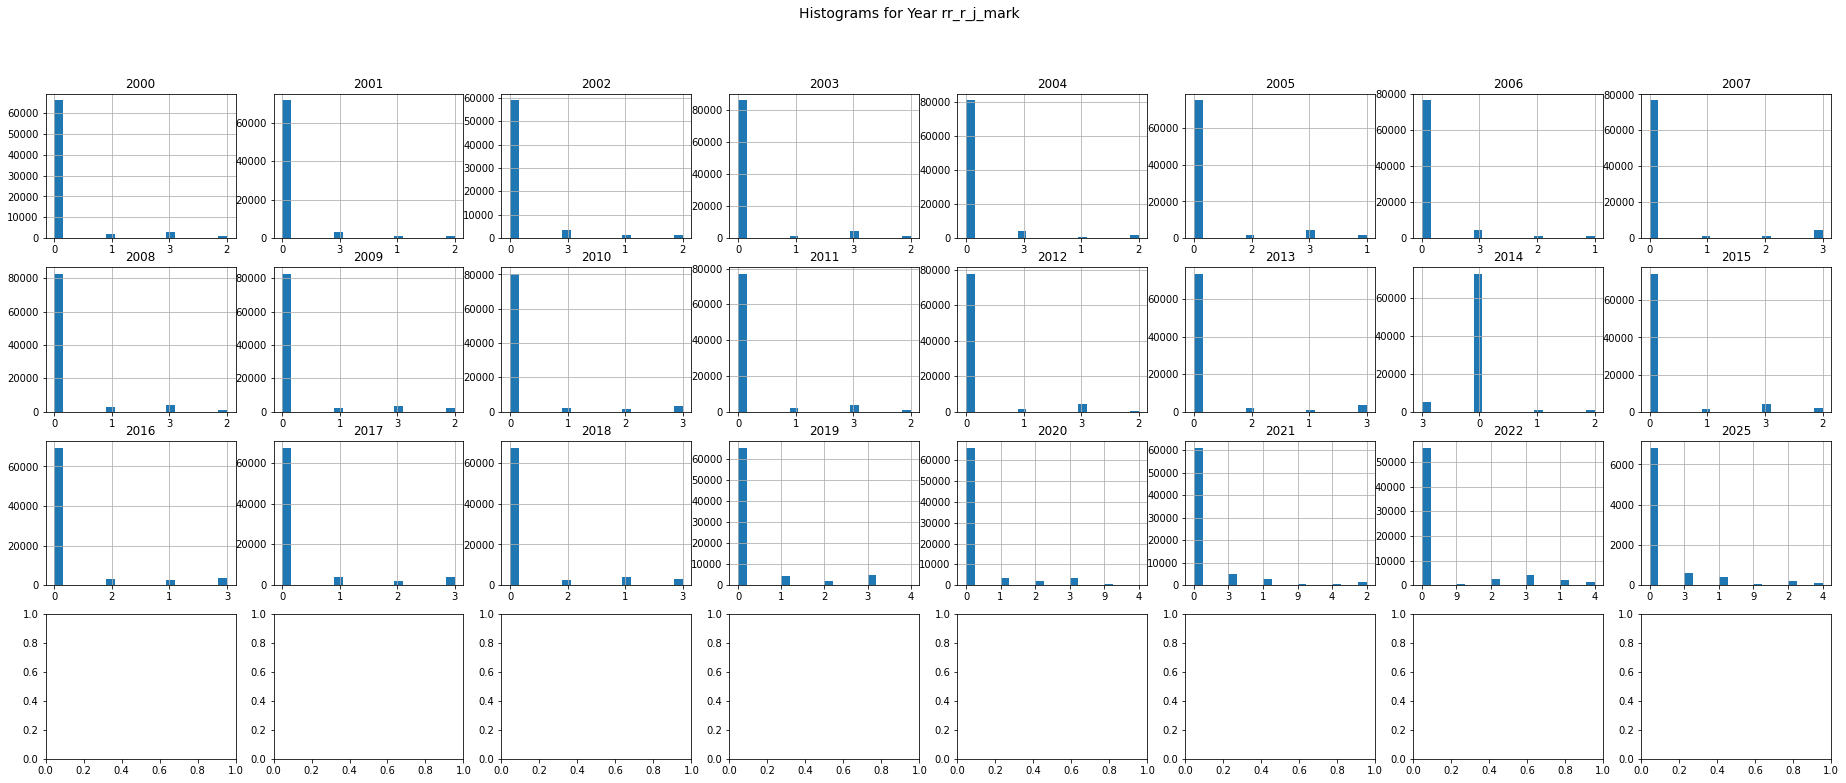

rr_r_age


In [ ]:
plot_histograms(dict_results, rows=4, cols=8, dpi=72)